In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.animation as anim 
from scipy import integrate
from tqdm import tqdm


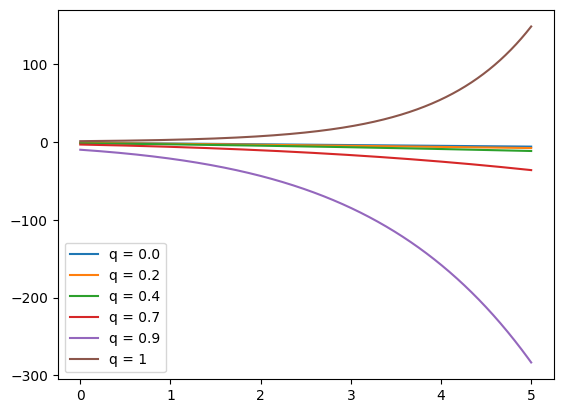

In [2]:
def System(xi,t,q):
    dfdt=abs(xi)**q*(xi/abs(xi))
    
    return dfdt

def Integrator2(f,r0,t,q):
    
    h = t[1] - t[0]
    
    x = np.zeros_like(t)

    
    x[0] = r0
    
    # Las pendientes instantaneas

    for i in range(1,len(t)):
        
        K1 = f(x[i-1],t[i-1],q)
        
        K2 = f(x[i-1]+0.5*h*K1,t[i-1]+0.5*h,q)
        
        K3 = f(x[i-1] - h*K1+2*h*K2,t[i-1] + h,q)
                
        x[i] = x[i-1] + (1/6)*h*(K1+4*K2+K3)
        
    return x

t = np.linspace(0,5,1000)
q = [0.,0.2, 0.4, 0.7, 0.9]

for i in q:
    r0 = 1/(i-1)
    x0 = Integrator2(System,r0,t,i)
    plt.plot(t,x0,label="q = " + str(i))
    

x = Integrator2(System,1,t,1)
plt.plot(t,x,label="q = 1")
plt.legend()